In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [4]:
df2023 = pd.read_excel('./data/Analyze data.xlsx')

In [5]:
df2023['floor_percent'] = df2023['floor']/df2023['total_floors'] * 100
df2023['price_per_m2'] = df2023['price']//df2023['Area']
df2023['price_per_m2_ln'] = np.log(df2023['price_per_m2'])

<AxesSubplot: >

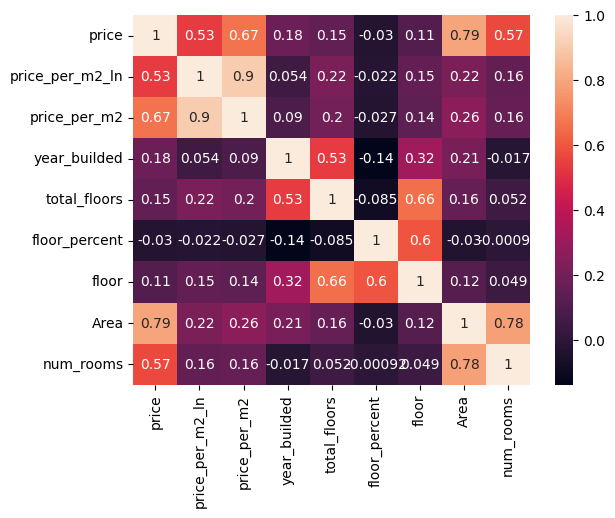

In [6]:
sns.heatmap(df2023[['price', 'price_per_m2_ln', 'price_per_m2', 'year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']].corr(),annot=True)

In [10]:
onehot = OneHotEncoder(sparse_output=False, drop='first')

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
dtree = GridSearchCV(DecisionTreeRegressor(min_samples_leaf=10), {'max_leaf_nodes':range(2,500)}, cv=10)


In [51]:
onehot = OneHotEncoder(sparse_output=False, drop='first')
onehot.fit(df2023[['Region']])
x = df2023[['year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']].join(pd.DataFrame(onehot.transform(df2023[['Region']]), columns=onehot.get_feature_names_out()))
y = df2023['price_per_m2_ln']

In [52]:
dtree.fit(x, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(min_samples_leaf=10),
             param_grid={'max_leaf_nodes': range(2, 500)})

In [54]:
dtree.best_params_

{'max_leaf_nodes': 308}

In [55]:
kf = KFold(n_splits=10)
kf.get_n_splits(x, y)

scores=[]
for train_index,test_index in kf.split(x, y):    
    X_train1, X_test, y_train1, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    scores.append(DecisionTreeRegressor(min_samples_leaf=10, max_leaf_nodes=308).fit(X_train1, y_train1).score(X_test, y_test))

np.array(scores).mean()

0.5354304621837024

In [57]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression().fit(x, y)
lm.score(x, y)

0.4016692033991681

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=1000), {''})

2022 check

In [62]:
df2022 = pd.read_excel('./data/Dataset 2022 .xlsx')

In [64]:
df2022.columns

Index(['Комнатность', 'Тип дома', 'Этаж', 'Этажность дома', 'Площадь, м²',
       'Состояние', 'Год постройки', 'Балкон', 'Квартира меблирована', 'Пол',
       'Бывшее общежитие', 'Стоимость'],
      dtype='object')

In [66]:
df2022 = df2022.rename(columns={'Комнатность': 'num_rooms', 'Этаж': 'floor', 'Этажность дома': 'total_floors', 'Площадь, м²': 'Area', 'Год постройки': 'year_builded', 'Стоимость':'price'})

In [73]:
df2022['floor_percent'] = df2022['floor']/df2022['total_floors'] * 100
df2022['price_per_m2'] = df2022['price']//df2022['Area']
df2022['price_per_m2_ln'] = np.log(df2022['price_per_m2'])

<AxesSubplot: >

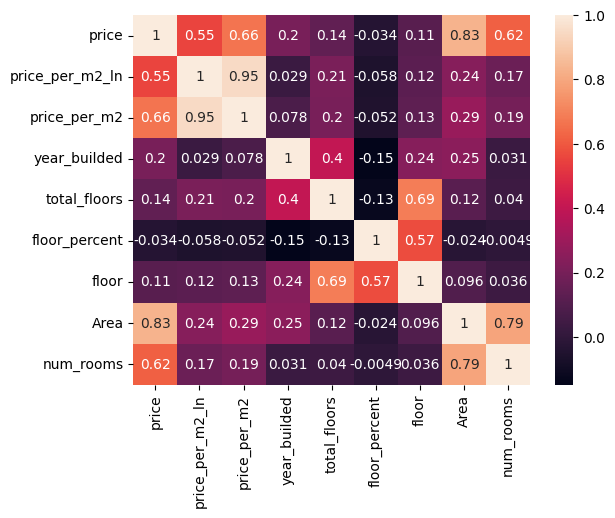

In [74]:
sns.heatmap(df2022[['price', 'price_per_m2_ln', 'price_per_m2', 'year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']].corr(),annot=True)

In [79]:
df2022[[ 'year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']].isna().any()

year_builded     False
total_floors     False
floor_percent     True
floor            False
Area             False
num_rooms        False
dtype: bool

In [78]:
LinearRegression().fit(df2022[[ 'year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']], df2022[ 'price_per_m2_ln']).score(df2022[[ 'year_builded', 'total_floors', 'floor_percent', 'floor', 'Area', 'num_rooms']], df2022[ 'price_per_m2_ln'])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

2020

In [75]:
df2020 = pd.read_excel('./data/data2020.xlsx')

In [77]:
df2020.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'title', 'price', 'city',
       'house', 'floor', 'area_description', 'num_rooms', 'cold_entry',
       'house_type', 'year_built', 'area', 'total_floor'],
      dtype='object')